<a href="https://colab.research.google.com/github/ianmcloughlin/circuits-notebooks/blob/main/circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circuits

***

The schemdraw package will draw circuits for us.

In [2]:
!pip install schemdraw[matplotlib]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import schemdraw
import schemdraw.logic as logic
import schemdraw.parsing as parsing

## Drawing by Hand

***

https://schemdraw.readthedocs.io/en/latest/elements/logic.html

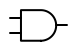

In [5]:
logic.And()

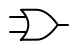

In [6]:
logic.Or()

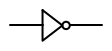

In [7]:
logic.Not()

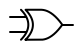

In [8]:
logic.Xor()

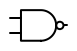

In [9]:
logic.Nand()

## Using Parsing

***

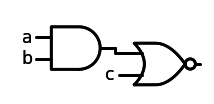

In [ ]:
# We can create circuits using Boolean logic.
parsing.logicparse("not ((a and b) or c)")

## Half Adder

***

https://schemdraw.readthedocs.io/en/latest/gallery/logicgate.html#half-adder

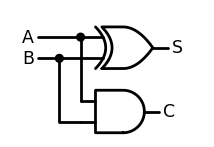

In [ ]:
with schemdraw.Drawing() as d:
    d.config(unit=0.5)
    d += (S := logic.Xor().label('S', 'right'))
    d += logic.Line().left(d.unit*2).at(S.in1).idot().label('A', 'left')
    d += (B := logic.Line().left().at(S.in2).dot())
    d += logic.Line().left().label('B', 'left')
    d += logic.Line().down(d.unit*3).at(S.in1)
    d += (C := logic.And().right().anchor('in1').label('C', 'right'))
    d += logic.Wire('|-').at(B.end).to(C.in2)

## Full Adder

***

https://schemdraw.readthedocs.io/en/latest/gallery/logicgate.html#full-adder

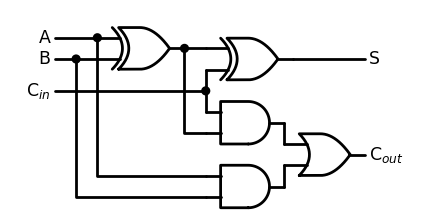

In [ ]:
with schemdraw.Drawing() as d:
    d.config(unit=0.5)
    d += (X1 := logic.Xor())
    d += (A := logic.Line().left(d.unit*2).at(X1.in1).idot().label('A', 'left'))
    d += (B := logic.Line().left().at(X1.in2).dot())
    d += logic.Line().left().label('B', 'left')

    d += logic.Line().right().at(X1.out).idot()
    d += (X2 := logic.Xor().anchor('in1'))
    d += (C := logic.Line().down(d.unit*2).at(X2.in2))
    d.push()
    d += logic.Dot().at(C.center)
    d += logic.Line().tox(A.end).label('C$_{in}$', 'left')
    d.pop()

    d += (A1 := logic.And().right().anchor('in1'))
    d += logic.Wire('-|').at(A1.in2).to(X1.out)
    d.move_from(A1.in2, dy=-d.unit*2)
    d += (A2 := logic.And().right().anchor('in1'))
    d += logic.Wire('-|').at(A2.in1).to(A.start)
    d += logic.Wire('-|').at(A2.in2).to(B.end)
    d.move_from(A1.out, dy=-(A1.out.y-A2.out.y)/2)
    d += (O1 := logic.Or().right().label('C$_{out}$', 'right'))
    d += logic.Line().at(A1.out).toy(O1.in1)
    d += logic.Line().at(A2.out).toy(O1.in2)
    d += logic.Line().at(X2.out).tox(O1.out).label('S', 'right')

## Flip Flip

***

https://schemdraw.readthedocs.io/en/latest/gallery/logicgate.html#j-k-flip-flop

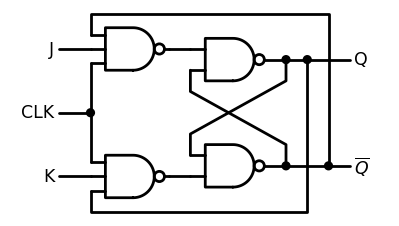

In [ ]:
with schemdraw.Drawing() as d:
    # Two front gates (SR latch)
    d += (G1 := logic.Nand(leadout=.75).anchor('in1'))
    d += logic.Line().length(d.unit/2).label('Q', 'right')
    d.move_from(G1.in1, dy=-2.5)
    d += (G2 := logic.Nand(leadout=.75).anchor('in1'))
    d += logic.Line().length(d.unit/2).label('$\overline{Q}$', 'right')
    d += logic.Wire('N', k=.5).at(G2.in1).to(G1.out).dot()
    d += logic.Wire('N', k=.5).at(G1.in2).to(G2.out).dot()

    # Two back gates
    d += logic.Line().left(d.unit/6).at(G1.in1)
    d += (J := logic.Nand(inputs=3).anchor('out').right())
    d += logic.Wire('n', k=.5).at(J.in1).to(G2.out, dx=1).dot()
    d += logic.Line().left(d.unit/4).at(J.in2).label('J', 'left')
    d += logic.Line().left(d.unit/6).at(G2.in2)
    d += (K := logic.Nand(inputs=3).right().anchor('out'))
    d += logic.Wire('n', k=-.5).at(K.in3).to(G1.out, dx=.5).dot()
    d += logic.Line().left(d.unit/4).at(K.in2).label('K', 'left')
    d += (C := logic.Line().at(J.in3).toy(K.in1))
    d += logic.Dot().at(C.center)
    d += logic.Line().left(d.unit/4).label('CLK', 'left')

***

### End